In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
api_url_base = 'https://api.iextrading.com/1.0'

In [3]:
def get_data():
    api_url = '{0}/stock/market/batch?symbols=aapl,fb,goog,nflx,amzn&types=chart&range=2y&last=1'\
    .format(api_url_base)
    response = requests.get(api_url)
    
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

In [4]:
data = get_data()

In [5]:
data.keys()

dict_keys(['AAPL', 'FB', 'GOOG', 'NFLX', 'AMZN'])

In [6]:
companies = [*data] # Return the keys i.e, company ticker symbol

In [7]:
companies

['AAPL', 'FB', 'GOOG', 'NFLX', 'AMZN']

In [8]:
for c in companies:
    exec("df_{} = pd.DataFrame(data[c]['chart'])".format(c))
    exec("df_{0} = df_{0}[(df_{0}['date'] > '2016-12-31') & (df_{0}['date'] < '2018-01-01')]".format(c))
    exec("df_{0} = df_{0}.reset_index(drop=True).set_index('date')".format(c))

In [9]:
print('Apple ', df_AAPL.shape)
print('Google: ', df_GOOG.shape)
print('Facebook', df_FB.shape)
print('NetFlix: ', df_NFLX.shape)
print('Amazon: ', df_AMZN.shape)

Apple  (251, 11)
Google:  (251, 11)
Facebook (251, 11)
NetFlix:  (251, 11)
Amazon:  (251, 11)


In [13]:
df_AAPL.head()

,change,changeOverTime,changePercent,close,high,label,low,open,unadjustedVolume,volume,vwap
date,,,,,,,,,,,
2017-01-03,0.322217,0.208345,0.285,113.4101,113.5859,"Jan 3, 17",112.0529,113.0684,28781865,28781865,112.8564
2017-01-04,-0.126933,0.206993,-0.112,113.2832,113.7617,"Jan 4, 17",113.0196,113.1172,21118116,21118116,113.3846
2017-01-05,0.576082,0.213131,0.509,113.8593,114.1075,"Jan 5, 17",113.0782,113.1856,22193587,22193587,113.7013
2017-01-06,1.269300,0.226655,1.115,115.1286,115.3727,"Jan 6, 17",113.7226,114.0253,31751900,31751900,114.9421
2017-01-09,1.054500,0.237892,0.916,116.1832,116.6128,"Jan 9, 17",115.1579,115.1677,33561948,33561948,116.1630


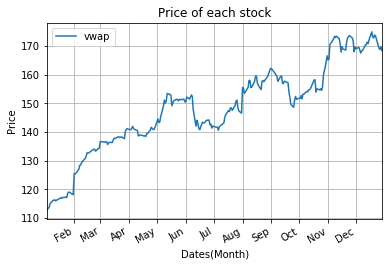

In [29]:
import matplotlib.dates as mdates

years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%b')

df_AAPL.index = pd.to_datetime(df_AAPL.index)

fig, ax = plt.subplots()
ax.plot(df_AAPL.index, df_AAPL['vwap'])
# ax.plot(df_GOOG.index, df_GOOG['vwap'])
# ax.plot(df_FB.index, df_FB['vwap'])
# ax.plot(df_NFLX.index, df_NFLX['vwap'])
# ax.plot(df_AMZN.index, df_AMZN['vwap'])

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(years)

datemin = min(df_AAPL.index)
datemax = max(df_AAPL.index)
ax.set_xlim(datemin, datemax)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_xlabel('Dates(Month)')
ax.set_ylabel('Price')
ax.set_title('Price of each stock')
ax.legend()
ax.grid(True)

fig.autofmt_xdate()
plt.show()